In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import glob
files = glob.glob('states*.csv')
df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)
us_census = pd.concat(df_list)
print(us_census.columns)
print(us_census.head())
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic     

In [4]:
us_census.Income = us_census.Income.replace('[\$,]', '', regex = True)

In [5]:
gender_split = us_census.GenderPop.str.split("_")
us_census['Men'] = gender_split.str.get(0)
us_census['Female'] = gender_split.str.get(1)

In [7]:
us_census['Men'] = us_census['Men'].str[0:-1]
us_census['Female'] = us_census['Female'].str[0:-1]
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Female'] = pd.to_numeric(us_census['Female'])
print(us_census.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific     Income            GenderPop       Men      Female  
0  3.25%   0.04%  59125.27       510388M_543273F    510388    543273.0  
1  1.25%   0.05%  46296.81     2322409M_2455167F   2322409   2455167.0  
2  1.02%   0.04%  51805.41       423477M_419713F    423477    419713.0  
3  1.41%   0.04%  47328.08     3167756M_3331859F   3167756   3331859.0  
4  3.67%   0.07%  55874.52   13171316M_13367298F  13171316  13367298.0  


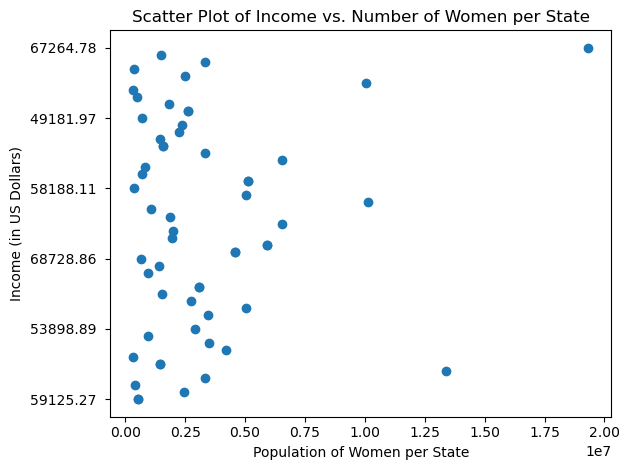

In [23]:
plt.scatter(us_census['Female'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.yticks(np.arange(0, 60, step=10))
plt.tight_layout()
plt.show()

In [24]:
us_census.Female = us_census.Female.fillna(value = us_census.TotalPop - us_census.Men)

In [26]:
print(us_census.duplicated().value_counts())

False    60
Name: count, dtype: int64


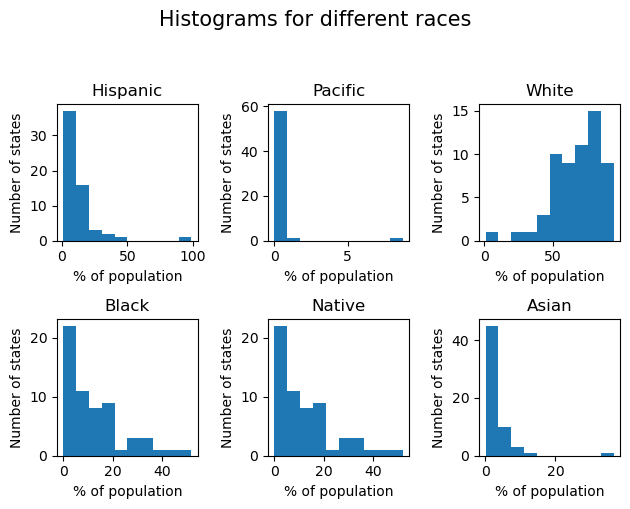

In [27]:
#
us_census.Hispanic = us_census.Hispanic.replace('%', '', regex = True)
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.Hispanic = us_census.Hispanic.fillna(value = us_census.Hispanic.mean())
#
us_census.White = us_census.White.replace('%', '', regex = True)
us_census.White = pd.to_numeric(us_census.White)
us_census.White = us_census.White.fillna(value = us_census.White.mean())
#
us_census.Black = us_census.Black.replace('%', '', regex = True)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Black = us_census.Black.fillna(value =us_census.Black.mean())
#
us_census.Native = us_census.Native.replace('%', '', regex = True)
us_census.Native = pd.to_numeric(us_census.Black)
us_census.Native = us_census.Native.fillna(value = us_census.Native.mean())
#
us_census.Asian = us_census.Asian.replace('%', '', regex = True)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Asian = us_census.Asian.fillna(value = us_census.Asian.mean())
#
us_census.Pacific = us_census.Pacific.replace('%', '', regex = True)
us_census.Pacific = pd.to_numeric(us_census.Pacific)
us_census.Pacific = us_census.Pacific.fillna(value = us_census.Pacific.mean())
#Histogram 
fig, ax = plt.subplots(2,3)
ax[0][0].hist(us_census['Hispanic'])
ax[0][1].hist(us_census['Pacific'])
ax[0][2].hist(us_census['White'])
ax[1][0].hist(us_census['Black'])
ax[1][1].hist(us_census['Native'])
ax[1][2].hist(us_census['Asian'])
ax[0][0].set(title='Hispanic', xlabel='% of population', ylabel='Number of states')
ax[0][1].set(title='Pacific', xlabel='% of population', ylabel='Number of states')
ax[0][2].set(title='White', xlabel='% of population', ylabel='Number of states')
ax[1][0].set(title='Black', xlabel='% of population', ylabel='Number of states')
ax[1][1].set(title='Native', xlabel='% of population', ylabel='Number of states')
ax[1][2].set(title='Asian', xlabel='% of population', ylabel='Number of states')
fig.suptitle('Histograms for different races', y=1.05, fontsize=15)
fig.tight_layout()
plt.show()